<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/5.%20%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B%20%D0%A1%D0%9D%D0%A1%20%D0%B8%20Transfer%20Learning/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B_%D0%9D%D0%A1_%D0%B8_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

### 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
from keras.datasets import fashion_mnist
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D, BatchNormalization, Activation
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from imutils import paths
import matplotlib.pyplot as plt
import random
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen

In [ ]:
model = keras.applications.EfficientNetB0()

model.summary() # Вывод краткого описания архитектуры созданной модели
model.get_config() # Вывод конфигурации созданной модели

21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

{'name': 'efficientnetb0',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None,
   'name': 'input_layer',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Rescaling',
   'config': {'name': 'rescaling',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'scale': 0.00392156862745098,
    'offset': 0.0},
   'registered_name': None,
   'build_config': {'input_shape': (None, 224, 224, 3)},
   'name': 'rescaling',
   'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__',
       'config': {'shape': (None, 224, 224, 3),
        'dtype': 'float32',
        'keras_history': ['input_layer', 0, 0]}},),
     'kwargs': {}}]},
  {'module': 'keras.layers',
   'class_name': 'Norm

### 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Путь к вашей директории
base_directory = '/content/drive/MyDrive/images'

# Инициализация четырех списков для хранения путей к изображениям в каждой поддиректории
imagePaths = []

# Проход по всем файлам и поддиректориям в базовой директории
for root, dirs, files in os.walk(base_directory):
    for file in files:
        # Проверка, что файл - изображение формата .jpeg
        if file.lower().endswith('.jpg'):
            # Формирование полного пути к изображению
            image_path = os.path.join(root, file)
            imagePaths.append(image_path)

len(imagePaths), imagePaths

(5,
 ['/content/drive/MyDrive/images/shark.jpg',
  '/content/drive/MyDrive/images/toucan.jpg',
  '/content/drive/MyDrive/images/chain.jpg',
  '/content/drive/MyDrive/images/scorpion.jpg',
  '/content/drive/MyDrive/images/lemon.jpg'])

In [ ]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
# Цикл по изображениям
for imagePath in imagePaths:
    image = cv2.imread(imagePath)  # загружаем изображение

    if image is None:
        continue  # пропустить, если изображение не удалось загрузить

    image = cv2.resize(image, (224, 224))  # меняем разрешение на 224x224 пикселей
    data.append(image)  # добавляем изображение в список

    # Извлекаем метку класса из имени родительской папки
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

### 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС (нормализация).

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [ ]:
import numpy as np

def preprocess_images(images):
    return [np.array(img, dtype='float32') / 255.0 for img in images]

### 1.5. Выведите изображения и соответствующие им классы (как в примере из теории)

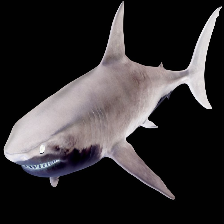

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
3


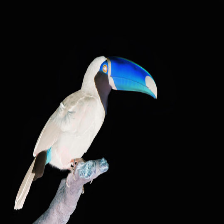

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
96


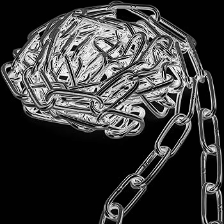

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
488


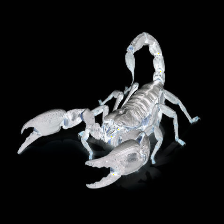

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
71


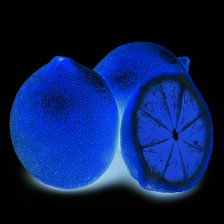

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
951


In [ ]:
from keras.applications.efficientnet import preprocess_input
import numpy as np
import cv2

def normalize(image, shape):
    image = cv2.resize(image, (shape[0], shape[1]))  # resize одного изображения
    image = np.array(image, dtype='float32')         # конвертация в float
    image = image.reshape(1, shape[0], shape[1], shape[2])  # делаем batch размерности (1, 224, 224, 3)
    return image

# Проход по изображениям
for image in data:
    image = normalize(image, (224, 224, 3))
    image = preprocess_input(image)

    # cv2_imshow ожидает 0-255 uint8 данные, поэтому обратная нормализация для просмотра
    img_to_show = (image[0] * 255).astype('uint8')
    cv2_imshow(img_to_show)

    res = model.predict(image)
    print(np.argmax(res))

    # Использовать decode_predictions только если модель — стандартная EfficientNet
    # print(keras.applications.efficientnet.decode_predictions(res, top=3))

# Задание 2. Использование обученной модели для работы со своим датасетом

### 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
from tensorflow import keras

# Загрузка EfficientNetB0 с предобученными весами ImageNet, без последних Dense-слоев
model = keras.applications.EfficientNetB0(
    include_top=True,     # True - использовать последние слои для 1000 классов
    weights='imagenet',   # загружаем веса ImageNet
    input_shape=(224, 224, 3)  # явно указываем размер входных данных
)

model.summary()  # Краткое описание
model.get_config()  # Конфигурация

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

{'name': 'efficientnetb0',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_1'},
   'registered_name': None,
   'name': 'input_layer_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Rescaling',
   'config': {'name': 'rescaling_2',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'scale': 0.00392156862745098,
    'offset': 0.0},
   'registered_name': None,
   'build_config': {'input_shape': (None, 224, 224, 3)},
   'name': 'rescaling_2',
   'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__',
       'config': {'shape': (None, 224, 224, 3),
        'dtype': 'float32',
        'keras_history': ['input_layer_1', 0, 0]}},),
     'kwargs': {}}]},
  {'module': 'keras.layers',
   'class_na

### 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [ ]:
import os

# Путь к папке с данными
base_directory = '/content/drive/MyDrive/animals_dataset'

# Классы, которые нужно выбрать
target_classes = ['бабочки', 'слоны', 'пауки']  # нижний регистр!

# Сбор всех изображений
imagePaths = []
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.lower().endswith(('.jpeg', '.jpg')):  # Проверка сразу двух расширений
            image_path = os.path.join(root, file)
            # Проверка по папке в нижнем регистре
            if any(cls in root.lower() for cls in target_classes):
                imagePaths.append(image_path)

print(f"Всего изображений: {len(imagePaths)}")

Всего изображений: 4236


In [ ]:
# инициализируем данные и метки
data = []
labels = []

In [ ]:
for imagePath in imagePaths:
    image = cv2.imread(imagePath)  # загружаем изображение
    if image is None:
        print(f"[ПРЕДУПРЕЖДЕНИЕ] Изображение не загружено: {imagePath}")
        continue  # пропустить битое изображение

    image = cv2.resize(image, (224, 224))  # ресайз под EfficientNet

    data.append(image)  # добавляем в список изображений

    label = os.path.basename(os.path.dirname(imagePath))  # безопаснее для пути
    labels.append(label)  # добавляем метку

In [ ]:
from keras.applications.efficientnet import preprocess_input

data = np.array(data, dtype="float32")
data = preprocess_input(data)  # нормализация именно для EfficientNetB0
labels = np.array(labels)

print(f"Форма изображений: {data.shape}")
print(f"Форма меток: {labels.shape}")

Форма изображений: (4236, 224, 224, 3)
Форма меток: (4236,)


In [ ]:
print(le.classes_)
print(len(le.classes_))

['Бабочки' 'Пауки' 'Слоны']
3


In [ ]:
from keras.utils import to_categorical

# Разбиваем данные
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# Переводим текстовые метки в числа
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

# А потом в one-hot
trainY = to_categorical(trainY)
testY = to_categorical(testY)

print(f"Форма trainX: {trainX.shape}")
print(f"Форма testX: {testX.shape}")
print(f"Форма trainY: {trainY.shape}")
print(f"Форма testY: {testY.shape}")

Форма trainX: (3177, 224, 224, 3)
Форма testX: (1059, 224, 224, 3)
Форма trainY: (3177, 3)
Форма testY: (1059, 3)


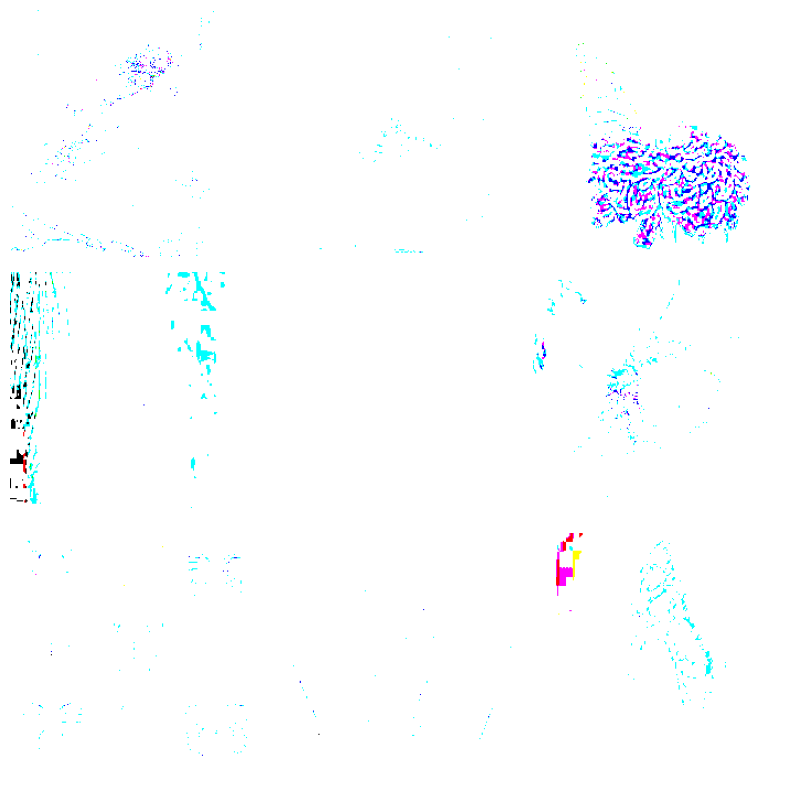

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))  # размер окна

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(trainX[i])  # без cmap, чтобы сохранить цвета
    plt.axis('off')  # убрать оси

plt.tight_layout()
plt.show()

### 2.3. Обучение своей модели на основе предобученной модели "*название модели, выбранной в п.2.1.*"

In [ ]:
base_model = keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(224, 224, 3),  # желательно оставить 224x224
    pooling='avg',
    weights='imagenet'
)

base_model.trainable = False  # заморозить веса EfficientNet

base_model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 224, 224,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 224, 224,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
base_model.trainable = False # замораживаем все слои базовой модели

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

my_model = Sequential()
my_model.add(base_model)
my_model.add(Dense(512, activation='relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.4))
my_model.add(Dense(128, activation='relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.4))
my_model.add(Dense(3, activation='softmax'))

my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,774,054 (18.21 MB)

 Trainable params: 723,203 (2.76 MB)

 Non-trainable params: 4,050,851 (15.45 MB)

In [ ]:
from keras.optimizers import Adam

my_model.compile(
    optimizer=Adam(learning_rate=1e-4),  # можно начать с чуть большего
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath="best_model_5_1.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=0
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,         # уменьшать lr в 2 раза
    patience=3,         # если 3 эпохи нет улучшения
    verbose=1,
    min_lr=1e-7         # минимальный lr
)

In [ ]:
EPOCHS=100

history = my_model.fit(
  trainX,
  trainY,
  batch_size=100,
  epochs=EPOCHS,
  validation_data=(testX, testY),
  callbacks=[early_stopping, checkpoint, reduce_lr]
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.6490 - loss: 0.9426

32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6536 - loss: 0.9306 - val_accuracy: 0.9783 - val_loss: 0.3644 - learning_rate: 1.0000e-04
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9571 - loss: 0.1238

32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 159ms/step - accuracy: 0.9573 - loss: 0.1232 - val_accuracy: 0.9830 - val_loss: 0.2149 - learning_rate: 1.0000e-04
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9689 - loss: 0.0891

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.9691 - loss: 0.0887 - val_accuracy: 0.9839 - val_loss: 0.1446 - learning_rate: 1.0000e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.9867 - loss: 0.0456 - val_accuracy: 0.9830 - val_loss: 0.1007 - learning_rate: 1.0000e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9838 - loss: 0.0447

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9838 - loss: 0.0448 - val_accuracy: 0.9868 - val_loss: 0.0737 - learning_rate: 1.0000e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9865 - loss: 0.0413 

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9865 - loss: 0.0414 - val_accuracy: 0.9877 - val_loss: 0.0554 - learning_rate: 1.0000e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9850 - loss: 0.0408 

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9850 - loss: 0.0408 - val_accuracy: 0.9887 - val_loss: 0.0442 - learning_rate: 1.0000e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.9950 - loss: 0.0235 - val_accuracy: 0.9887 - val_loss: 0.0380 - learning_rate: 1.0000e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9904 - loss: 0.0336 - val_accuracy: 0.9877 - val_loss: 0.0337 - learning_rate: 1.0000e-04
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9918 - loss: 0.0284
Epoch 10: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.9918 - loss: 0.0283 - val_accuracy: 0.9877 - val_loss: 0.0309 - learning_rate: 1.0000e-04
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.9920 - loss: 0.0252 - val_accuracy: 0.9877 - val_loss: 0.0301 - learning_rate: 5.0000e-05
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9949

In [ ]:
import pickle

labels_path = "label_class_bin"

with open('label_class_bin', 'wb') as f:
    pickle.dump(le, f)

### 2.4. Визуализация процесса обучения модели

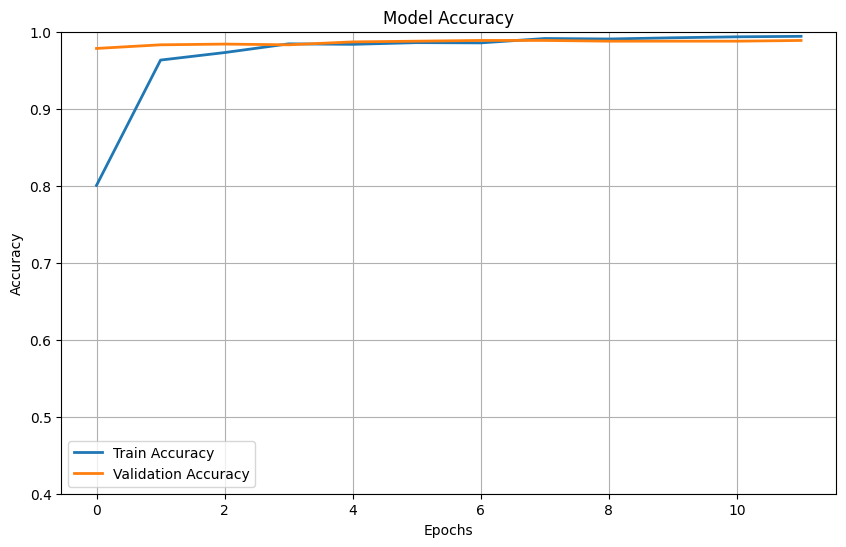

In [ ]:
plt.figure(figsize=(10,6))  # Увеличиваем размер графика

plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.ylim(0.4, 1)
plt.grid(True)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

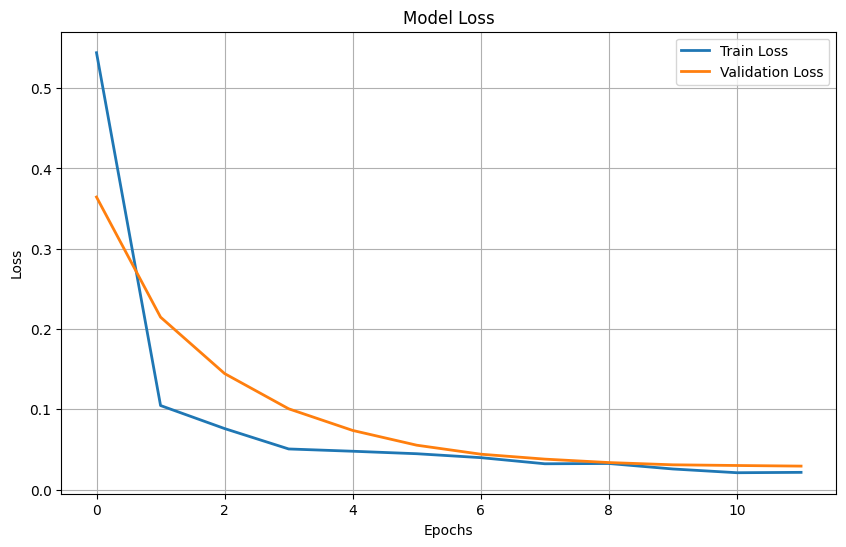

In [ ]:
plt.figure(figsize=(10,6))  # Размер графика

plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.grid(True)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### 2.5. Подготовьте набор проверочных данных (examples)

In [ ]:
examples=['/content/drive/MyDrive/animals_dataset/бабочка.jpg',
          '/content/drive/MyDrive/animals_dataset/паук.jpg',
          '/content/drive/MyDrive/animals_dataset/паук_2.jpg',
          '/content/drive/MyDrive/animals_dataset/слон.jpg']

### 2.6. Реализуйте графический интерфейс для взаимодействия с обученной моделью, используя [Gradio](https://www.gradio.app/guides/image-classification-in-tensorflow). В качестве примеров (параметр examples в Gradio), используйте изображения из списка images (п.1.2.)

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
from keras.models import load_model
import gradio
import pickle
import cv2

def preprocess_image_new(img, compression_size=224):
    image = img.copy()
    image = cv2.resize(image, (compression_size, compression_size))
    image = image.astype('float32')
    image = preprocess_input(image)           # EfficientNet нормализация
    image = np.expand_dims(image, axis=0)      # добавляем размер батча
    return image

In [ ]:
# Заранее загружаем модель и лейблы один раз
model = load_model("/content/drive/MyDrive/models/best_model_5_1.h5")
with open("/content/drive/MyDrive/models/label_class_bin", "rb") as f:
    lb = pickle.load(f)

def get_predict_new(img, preprocess_func=preprocess_image_new):
    image = preprocess_func(img)  # просто preprocess_func
    preds = model.predict(image)
    confidences = {lb.classes_[i]: float(preds[0][i]) for i in range(len(preds[0]))}
    return confidences

In [ ]:
print("Содержимое lb:", lb)
print("Тип lb:", type(lb))

# Если lb не строка, можно попробовать вывести классы
if hasattr(lb, "classes_"):
    print("Классы lb:", lb.classes_)
else:
    print("lb не имеет атрибута classes_")

Содержимое lb: LabelEncoder()
Тип lb: <class 'sklearn.preprocessing._label.LabelEncoder'>
Классы lb: ['Бабочки' 'Пауки' 'Слоны']


In [ ]:
import gradio as gr

interface_new = gr.Interface(
    fn=get_predict_new,
    inputs=gr.Image(label="Загрузите изображение"),
    outputs=gr.Label(num_top_classes=len(lb.classes_)),
    examples=examples
)

interface_new.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9434bb3a0cbf2da8a9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9434bb3a0cbf2da8a9.gradio.live


# Задание 3. Классификация набора пространственных данных EuroSat (для магистров)

- Ссылка на датасет: https://github.com/phelber/eurosat

- Описание на kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

В этом задании Вам будет предоставлен набор данных EuroSat, который содержит снимки земной поверхности, снятые спутником Sentinel-2. Вам нужно будет обучить модель для классификации этих изображений на 10 классов, представляющих различные типы земного покрова.

### **3.1. Загрузка данных:**
  * [Скачайте](https://madm.dfki.de/files/sentinel/EuroSAT.zip) набор данных EuroSat
  * Разделите данные на обучающую, валидационную и тестовую выборки.



In [ ]:
!pip install torch torchvision

import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
from tqdm import tqdm

In [ ]:
# Трансформация изображений
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Загрузка EuroSAT (RGB-версия, 10 классов)
dataset = datasets.EuroSAT(root='data', download=True, transform=transform)

In [ ]:
# Делим датасет: 70% train, 15% val, 15% test
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")

Train size: 18900
Validation size: 4050
Test size: 4050


### **3.2. Выбор архитектуры нейронной сети:**
  * Выберите архитектуру нейронной сети, основанную на трансферном обучении, например, ResNet50, VGG16 или InceptionV3 ([полный список](https://keras.io/api/applications/)).
  * Загрузите предобученную модель выбранной архитектуры.


In [ ]:
import torchvision.models as models
import torch.nn as nn

# Загружаем предобученную ResNet50
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
num_features = model.fc.in_features

# Новый классификатор
model.fc = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 10)  # 10 классов в EuroSAT
)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

### **3.3. Дообучение модели:**
  * Добавьте к предобученной модели несколько слоев для классификации изображений EuroSat.
  * Обучите модель на обучающей выборке.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.0005)

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
EPOCHS = 20
best_val_acc = 0.0
patience = 3
counter = 0

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total

    # Валидация
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total

    scheduler.step(val_acc)  # обновляем scheduler

    print(f"\nTrain Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss:   {val_loss:.4f}, Val Acc:   {val_acc:.4f}")

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        counter = 0
        torch.save(model.state_dict(), 'best_resnet50_eurosat.pth')
        print("Сохранили лучшую модель")
    else:
        counter += 1
        print(f"Нет улучшения {counter} эпох(и)")
        if counter >= patience:
            print("Ранняя остановка")
            break

Epoch 1/20: 100%|██████████| 591/591 [01:33<00:00,  6.33it/s]



Train Loss: 0.6078, Train Acc: 0.8044
Val Loss:   0.2577, Val Acc:   0.9163
Сохранили лучшую модель


Epoch 2/20: 100%|██████████| 591/591 [01:31<00:00,  6.44it/s]



Train Loss: 0.3598, Train Acc: 0.8810
Val Loss:   0.2081, Val Acc:   0.9291
Сохранили лучшую модель


Epoch 3/20: 100%|██████████| 591/591 [01:30<00:00,  6.54it/s]



Train Loss: 0.3274, Train Acc: 0.8888
Val Loss:   0.2069, Val Acc:   0.9291
Нет улучшения 1 эпох(и)


Epoch 4/20: 100%|██████████| 591/591 [01:30<00:00,  6.54it/s]



Train Loss: 0.2935, Train Acc: 0.8994
Val Loss:   0.1940, Val Acc:   0.9309
Сохранили лучшую модель


Epoch 5/20: 100%|██████████| 591/591 [01:30<00:00,  6.53it/s]



Train Loss: 0.2811, Train Acc: 0.9048
Val Loss:   0.1891, Val Acc:   0.9358
Сохранили лучшую модель


Epoch 6/20: 100%|██████████| 591/591 [01:29<00:00,  6.59it/s]



Train Loss: 0.2644, Train Acc: 0.9090
Val Loss:   0.1690, Val Acc:   0.9346
Нет улучшения 1 эпох(и)


Epoch 7/20: 100%|██████████| 591/591 [01:29<00:00,  6.60it/s]



Train Loss: 0.2577, Train Acc: 0.9119
Val Loss:   0.1951, Val Acc:   0.9326
Нет улучшения 2 эпох(и)


Epoch 8/20: 100%|██████████| 591/591 [01:29<00:00,  6.62it/s]



Train Loss: 0.2472, Train Acc: 0.9148
Val Loss:   0.1677, Val Acc:   0.9400
Сохранили лучшую модель


Epoch 9/20: 100%|██████████| 591/591 [01:29<00:00,  6.62it/s]



Train Loss: 0.2398, Train Acc: 0.9157
Val Loss:   0.1717, Val Acc:   0.9353
Нет улучшения 1 эпох(и)


Epoch 10/20: 100%|██████████| 591/591 [01:30<00:00,  6.56it/s]



Train Loss: 0.2420, Train Acc: 0.9168
Val Loss:   0.1774, Val Acc:   0.9390
Нет улучшения 2 эпох(и)


Epoch 11/20: 100%|██████████| 591/591 [01:29<00:00,  6.59it/s]



Train Loss: 0.2265, Train Acc: 0.9208
Val Loss:   0.1781, Val Acc:   0.9348
Нет улучшения 3 эпох(и)
Ранняя остановка


**Далее моддель EfficientNet-B0**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
# Трансформация изображений
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


# Загрузка EuroSAT (RGB-версия, 10 классов)
dataset = datasets.EuroSAT(root='data', download=True, transform=transform)

In [ ]:
# Делим датасет: 70% train, 15% val, 15% test
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")

Train size: 18900
Validation size: 4050
Test size: 4050


In [ ]:
import torchvision.models as models
import torch.nn as nn

# Загружаем предобученную efficientnet_b0
model = models.efficientnet_b0(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
num_features = model.classifier[1].in_features

model.classifier[1] = nn.Linear(num_features, 10)  # 10 классов

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [ ]:
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0005)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)


In [ ]:
EPOCHS = 20
patience = 3
best_val_acc = 0.0
counter = 0

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total

    # Валидация
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total

    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f}, Val   Acc: {val_acc:.4f}")

    scheduler.step(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        counter = 0
        torch.save(model.state_dict(), 'best_efficientnetb0_eurosat.pth')
        print("Сохранили лучшую модель")
    else:
        counter += 1
        print(f"Нет улучшения {counter} эпох(и)")
        if counter >= patience:
            print("Ранняя остановка")
            break

Epoch 1/20: 100%|██████████| 591/591 [01:00<00:00,  9.71it/s]



Epoch 1/20
Train Loss: 0.7635, Train Acc: 0.7971
Val   Loss: 0.3460, Val   Acc: 0.9074
Сохранили лучшую модель


Epoch 2/20: 100%|██████████| 591/591 [01:00<00:00,  9.82it/s]



Epoch 2/20
Train Loss: 0.4175, Train Acc: 0.8697
Val   Loss: 0.2728, Val   Acc: 0.9165
Сохранили лучшую модель


Epoch 3/20: 100%|██████████| 591/591 [00:59<00:00,  9.87it/s]



Epoch 3/20
Train Loss: 0.3714, Train Acc: 0.8779
Val   Loss: 0.2390, Val   Acc: 0.9242
Сохранили лучшую модель


Epoch 4/20: 100%|██████████| 591/591 [00:59<00:00,  9.87it/s]



Epoch 4/20
Train Loss: 0.3370, Train Acc: 0.8916
Val   Loss: 0.2233, Val   Acc: 0.9281
Сохранили лучшую модель


Epoch 5/20: 100%|██████████| 591/591 [00:59<00:00,  9.96it/s]



Epoch 5/20
Train Loss: 0.3243, Train Acc: 0.8932
Val   Loss: 0.2152, Val   Acc: 0.9277
Нет улучшения 1 эпох(и)


Epoch 6/20: 100%|██████████| 591/591 [00:59<00:00,  9.88it/s]



Epoch 6/20
Train Loss: 0.3071, Train Acc: 0.8966
Val   Loss: 0.2048, Val   Acc: 0.9343
Сохранили лучшую модель


Epoch 7/20: 100%|██████████| 591/591 [00:58<00:00, 10.03it/s]



Epoch 7/20
Train Loss: 0.3045, Train Acc: 0.8951
Val   Loss: 0.1935, Val   Acc: 0.9370
Сохранили лучшую модель


Epoch 8/20: 100%|██████████| 591/591 [00:59<00:00,  9.90it/s]



Epoch 8/20
Train Loss: 0.2869, Train Acc: 0.9034
Val   Loss: 0.1985, Val   Acc: 0.9338
Нет улучшения 1 эпох(и)


Epoch 9/20: 100%|██████████| 591/591 [00:59<00:00,  9.97it/s]



Epoch 9/20
Train Loss: 0.2886, Train Acc: 0.9020
Val   Loss: 0.1876, Val   Acc: 0.9375
Сохранили лучшую модель


Epoch 10/20: 100%|██████████| 591/591 [00:59<00:00, 10.01it/s]



Epoch 10/20
Train Loss: 0.2817, Train Acc: 0.9068
Val   Loss: 0.1904, Val   Acc: 0.9407
Сохранили лучшую модель


Epoch 11/20: 100%|██████████| 591/591 [00:59<00:00,  9.93it/s]



Epoch 11/20
Train Loss: 0.2819, Train Acc: 0.9024
Val   Loss: 0.1869, Val   Acc: 0.9380
Нет улучшения 1 эпох(и)


Epoch 12/20: 100%|██████████| 591/591 [00:59<00:00, 10.01it/s]



Epoch 12/20
Train Loss: 0.2812, Train Acc: 0.9028
Val   Loss: 0.2030, Val   Acc: 0.9360
Нет улучшения 2 эпох(и)


Epoch 13/20: 100%|██████████| 591/591 [00:59<00:00,  9.93it/s]



Epoch 13/20
Train Loss: 0.2712, Train Acc: 0.9084
Val   Loss: 0.1890, Val   Acc: 0.9380
Нет улучшения 3 эпох(и)
Ранняя остановка


**Далее модель VGG16**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
from tqdm import tqdm

In [ ]:
# Трансформация изображений
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Загрузка EuroSAT (RGB-версия, 10 классов)
dataset = datasets.EuroSAT(root='data', download=True, transform=transform)

In [ ]:
# Делим датасет: 70% train, 15% val, 15% test
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")

Train size: 18900
Validation size: 4050
Test size: 4050


In [ ]:
import torchvision.models as models
import torch.nn as nn

# Загружаем предобученную VGG16
model = models.vgg16(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
num_features = model.classifier[6].in_features  # последний Linear слой

model.classifier[6] = nn.Linear(num_features, 10)  # 10 классов

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()

# Оптимизируем только параметры классификатора (classifier[6] и предыдущие слои classifier)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0005)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)


In [ ]:
EPOCHS = 20
patience = 3
best_val_acc = 0.0
counter = 0

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total

    # Валидация
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total

    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f}, Val   Acc: {val_acc:.4f}")

    scheduler.step(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        counter = 0
        torch.save(model.state_dict(), 'best_vgg16_eurosat.pth')
        print("Сохранили лучшую модель")
    else:
        counter += 1
        print(f"Нет улучшения {counter} эпох(и)")
        if counter >= patience:
            print("Ранняя остановка")
            break

Epoch 1/20: 100%|██████████| 591/591 [02:00<00:00,  4.90it/s]



Epoch 1/20
Train Loss: 0.4428, Train Acc: 0.8695
Val   Loss: 0.2623, Val   Acc: 0.9156
Сохранили лучшую модель


Epoch 2/20: 100%|██████████| 591/591 [02:00<00:00,  4.89it/s]



Epoch 2/20
Train Loss: 0.2721, Train Acc: 0.9080
Val   Loss: 0.2178, Val   Acc: 0.9259
Сохранили лучшую модель


Epoch 3/20: 100%|██████████| 591/591 [02:01<00:00,  4.86it/s]



Epoch 3/20
Train Loss: 0.2450, Train Acc: 0.9156
Val   Loss: 0.2074, Val   Acc: 0.9284
Сохранили лучшую модель


Epoch 4/20: 100%|██████████| 591/591 [02:00<00:00,  4.91it/s]



Epoch 4/20
Train Loss: 0.2265, Train Acc: 0.9213
Val   Loss: 0.2026, Val   Acc: 0.9299
Сохранили лучшую модель


Epoch 5/20: 100%|██████████| 591/591 [02:01<00:00,  4.87it/s]



Epoch 5/20
Train Loss: 0.2220, Train Acc: 0.9229
Val   Loss: 0.1983, Val   Acc: 0.9321
Сохранили лучшую модель


Epoch 6/20: 100%|██████████| 591/591 [02:00<00:00,  4.89it/s]



Epoch 6/20
Train Loss: 0.2141, Train Acc: 0.9263
Val   Loss: 0.1896, Val   Acc: 0.9353
Сохранили лучшую модель


Epoch 7/20: 100%|██████████| 591/591 [02:00<00:00,  4.90it/s]



Epoch 7/20
Train Loss: 0.2046, Train Acc: 0.9287
Val   Loss: 0.1835, Val   Acc: 0.9385
Сохранили лучшую модель


Epoch 8/20: 100%|██████████| 591/591 [02:00<00:00,  4.92it/s]



Epoch 8/20
Train Loss: 0.2032, Train Acc: 0.9288
Val   Loss: 0.1846, Val   Acc: 0.9370
Нет улучшения 1 эпох(и)


Epoch 9/20: 100%|██████████| 591/591 [02:00<00:00,  4.91it/s]



Epoch 9/20
Train Loss: 0.1993, Train Acc: 0.9293
Val   Loss: 0.1897, Val   Acc: 0.9348
Нет улучшения 2 эпох(и)


Epoch 10/20: 100%|██████████| 591/591 [02:00<00:00,  4.91it/s]



Epoch 10/20
Train Loss: 0.1997, Train Acc: 0.9303
Val   Loss: 0.1872, Val   Acc: 0.9336
Нет улучшения 3 эпох(и)
Ранняя остановка


**Далее модель InceptionV3**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
from tqdm import tqdm

In [ ]:
# Трансформация изображений
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Загрузка EuroSAT (RGB-версия, 10 классов)
dataset = datasets.EuroSAT(root='data', download=True, transform=transform)

In [ ]:
# Делим датасет: 70% train, 15% val, 15% test
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")

Train size: 18900
Validation size: 4050
Test size: 4050


In [ ]:
import torchvision.models as models
import torch.nn as nn

# Загружаем предобученную inception_v3
model = models.inception_v3(pretrained=True, aux_logits=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 194MB/s] 


In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
num_features_main = model.fc.in_features
model.fc = nn.Linear(num_features_main, 10)

num_features_aux = model.AuxLogits.fc.in_features
model.AuxLogits.fc = nn.Linear(num_features_aux, 10)

In [ ]:
for param in model.fc.parameters():
    param.requires_grad = True

for param in model.AuxLogits.parameters():
    param.requires_grad = True

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0005)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

In [ ]:
EPOCHS = 20
patience = 3
best_val_acc = 0.0
counter = 0

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs, aux_outputs = model(inputs)
        loss1 = criterion(outputs, labels)
        loss2 = criterion(aux_outputs, labels)
        loss = loss1 + 0.4 * loss2  # как рекомендует автор InceptionV3

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total

    # Валидация
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  # В eval режиме только один выход
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total

    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f}, Val   Acc: {val_acc:.4f}")

    scheduler.step(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        counter = 0
        torch.save(model.state_dict(), 'best_inceptionv3_eurosat.pth')
        print("Сохранили лучшую модель")
    else:
        counter += 1
        print(f"Нет улучшения {counter} эпох(и)")
        if counter >= patience:
            print("Ранняя остановка")
            break

Epoch 1/20: 100%|██████████| 591/591 [02:21<00:00,  4.17it/s]



Epoch 1/20
Train Loss: 1.0187, Train Acc: 0.7534
Val   Loss: 0.4673, Val   Acc: 0.8770
Сохранили лучшую модель


Epoch 2/20: 100%|██████████| 591/591 [02:20<00:00,  4.21it/s]



Epoch 2/20
Train Loss: 0.5630, Train Acc: 0.8416
Val   Loss: 0.3529, Val   Acc: 0.8956
Сохранили лучшую модель


Epoch 3/20: 100%|██████████| 591/591 [02:20<00:00,  4.22it/s]



Epoch 3/20
Train Loss: 0.4905, Train Acc: 0.8526
Val   Loss: 0.3106, Val   Acc: 0.8988
Сохранили лучшую модель


Epoch 4/20: 100%|██████████| 591/591 [02:20<00:00,  4.19it/s]



Epoch 4/20
Train Loss: 0.4447, Train Acc: 0.8604
Val   Loss: 0.2917, Val   Acc: 0.9052
Сохранили лучшую модель


Epoch 5/20: 100%|██████████| 591/591 [02:20<00:00,  4.20it/s]



Epoch 5/20
Train Loss: 0.4327, Train Acc: 0.8650
Val   Loss: 0.2755, Val   Acc: 0.9146
Сохранили лучшую модель


Epoch 6/20: 100%|██████████| 591/591 [02:20<00:00,  4.20it/s]



Epoch 6/20
Train Loss: 0.4142, Train Acc: 0.8666
Val   Loss: 0.2799, Val   Acc: 0.9123
Нет улучшения 1 эпох(и)


Epoch 7/20: 100%|██████████| 591/591 [02:20<00:00,  4.20it/s]



Epoch 7/20
Train Loss: 0.3990, Train Acc: 0.8704
Val   Loss: 0.2657, Val   Acc: 0.9156
Сохранили лучшую модель


Epoch 8/20: 100%|██████████| 591/591 [02:21<00:00,  4.19it/s]



Epoch 8/20
Train Loss: 0.4037, Train Acc: 0.8683
Val   Loss: 0.2630, Val   Acc: 0.9119
Нет улучшения 1 эпох(и)


Epoch 9/20: 100%|██████████| 591/591 [02:20<00:00,  4.20it/s]



Epoch 9/20
Train Loss: 0.3875, Train Acc: 0.8711
Val   Loss: 0.2491, Val   Acc: 0.9193
Сохранили лучшую модель


Epoch 10/20: 100%|██████████| 591/591 [02:21<00:00,  4.19it/s]



Epoch 10/20
Train Loss: 0.3938, Train Acc: 0.8728
Val   Loss: 0.2536, Val   Acc: 0.9163
Нет улучшения 1 эпох(и)


Epoch 11/20: 100%|██████████| 591/591 [02:20<00:00,  4.20it/s]



Epoch 11/20
Train Loss: 0.3958, Train Acc: 0.8694
Val   Loss: 0.2447, Val   Acc: 0.9173
Нет улучшения 2 эпох(и)


Epoch 12/20: 100%|██████████| 591/591 [02:21<00:00,  4.18it/s]



Epoch 12/20
Train Loss: 0.3928, Train Acc: 0.8681
Val   Loss: 0.2473, Val   Acc: 0.9175
Нет улучшения 3 эпох(и)
Ранняя остановка




### **3.4. Оценка модели:**
  * Оцените производительность модели на валидационной и тестовой выборках.
  * Сравните результаты с другими архитектурами нейронных сетей.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Пути к моделям
model_paths = {
    "ResNet50": "/content/drive/MyDrive/models/best_resnet50_eurosat.pth",
    "EfficientNet-B0": "/content/drive/MyDrive/models/best_efficientnetb0_eurosat.pth",
    "VGG16": "/content/drive/MyDrive/models/best_vgg16_eurosat.pth",
    "InceptionV3": "/content/drive/MyDrive/models/best_inceptionv3_eurosat.pth"
}

In [ ]:
def load_model(model_name):
    if model_name == "ResNet50":
        model = models.resnet50(pretrained=False)
        model.fc = nn.Sequential(
            nn.Linear(model.fc.in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 10)
        )
    elif model_name == "EfficientNet-B0":
        model = models.efficientnet_b0(pretrained=False)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, 10)
    elif model_name == "VGG16":
        model = models.vgg16(pretrained=False)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)
    elif model_name == "InceptionV3":
        model = models.inception_v3(pretrained=False, aux_logits=True)
        model.fc = nn.Linear(model.fc.in_features, 10)
        model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, 10)
    else:
        raise ValueError("Unknown model name")

    return model.to(device)

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    total, correct = 0, 0
    loss_total = 0.0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss_total += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = correct / total
    avg_loss = loss_total / total
    return acc, avg_loss, all_preds, all_labels

In [ ]:
all_results = {}

for name, path in model_paths.items():
    print(f"=== {name} ===")
    model = load_model(name)
    model.load_state_dict(torch.load(path, map_location=device))

    val_acc, val_loss, val_preds, val_labels = evaluate_model(model, val_loader)
    test_acc, test_loss, test_preds, test_labels = evaluate_model(model, test_loader)

    print(f"Validation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")
    print(classification_report(val_labels, val_preds))

    print(f"Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")
    print(classification_report(test_labels, test_preds))

    all_results[name] = {
        "test_preds": test_preds,
        "test_labels": test_labels
    }

=== ResNet50 ===


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Validation Accuracy: 0.7746, Loss: 0.6480
              precision    recall  f1-score   support

           0       0.59      0.98      0.73       469
           1       1.00      0.60      0.75       414
           2       0.89      0.81      0.85       480
           3       0.90      0.56      0.69       379
           4       0.86      0.93      0.89       349
           5       0.93      0.56      0.70       274
           6       0.90      0.48      0.62       393
           7       0.99      0.88      0.93       455
           8       0.66      0.79      0.72       360
           9       0.63      1.00      0.77       477

    accuracy                           0.77      4050
   macro avg       0.83      0.76      0.77      4050
weighted avg       0.83      0.77      0.77      4050

Test Accuracy: 0.7793, Loss: 0.6587
              precision    recall  f1-score   support

           0       0.60      0.97      0.74       458
           1       1.00      0.58      0.74       459


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Validation Accuracy: 0.6798, Loss: 1.1338
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       469
           1       0.99      0.35      0.52       414
           2       0.67      0.77      0.72       480
           3       0.88      0.67      0.76       379
           4       0.49      0.95      0.65       349
           5       0.72      0.71      0.71       274
           6       0.70      0.74      0.72       393
           7       0.88      0.05      0.10       455
           8       0.77      0.70      0.73       360
           9       0.68      0.95      0.79       477

    accuracy                           0.68      4050
   macro avg       0.74      0.68      0.65      4050
weighted avg       0.74      0.68      0.64      4050

Test Accuracy: 0.6810, Loss: 1.1472
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       458
           1       0.99      0.34      0.50       459


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Validation Accuracy: 0.8968, Loss: 0.3054
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       469
           1       1.00      0.71      0.83       414
           2       0.71      0.97      0.82       480
           3       0.88      0.87      0.88       379
           4       0.97      0.96      0.96       349
           5       0.92      0.81      0.86       274
           6       0.95      0.86      0.90       393
           7       0.92      0.99      0.95       455
           8       0.88      0.84      0.86       360
           9       1.00      0.95      0.97       477

    accuracy                           0.90      4050
   macro avg       0.91      0.89      0.90      4050
weighted avg       0.91      0.90      0.90      4050

Test Accuracy: 0.8877, Loss: 0.3218
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       458
           1       1.00      0.69      0.82       459


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Validation Accuracy: 0.4728, Loss: 8.5705
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       469
           1       0.00      0.00      0.00       414
           2       0.74      0.55      0.63       480
           3       0.75      0.24      0.37       379
           4       0.80      0.64      0.71       349
           5       0.44      0.07      0.11       274
           6       0.91      0.36      0.51       393
           7       0.87      0.58      0.69       455
           8       0.35      0.19      0.25       360
           9       0.23      0.99      0.37       477

    accuracy                           0.47      4050
   macro avg       0.58      0.44      0.44      4050
weighted avg       0.59      0.47      0.46      4050

Test Accuracy: 0.4578, Loss: 9.1334
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       458
           1       0.00      0.00      0.00       459


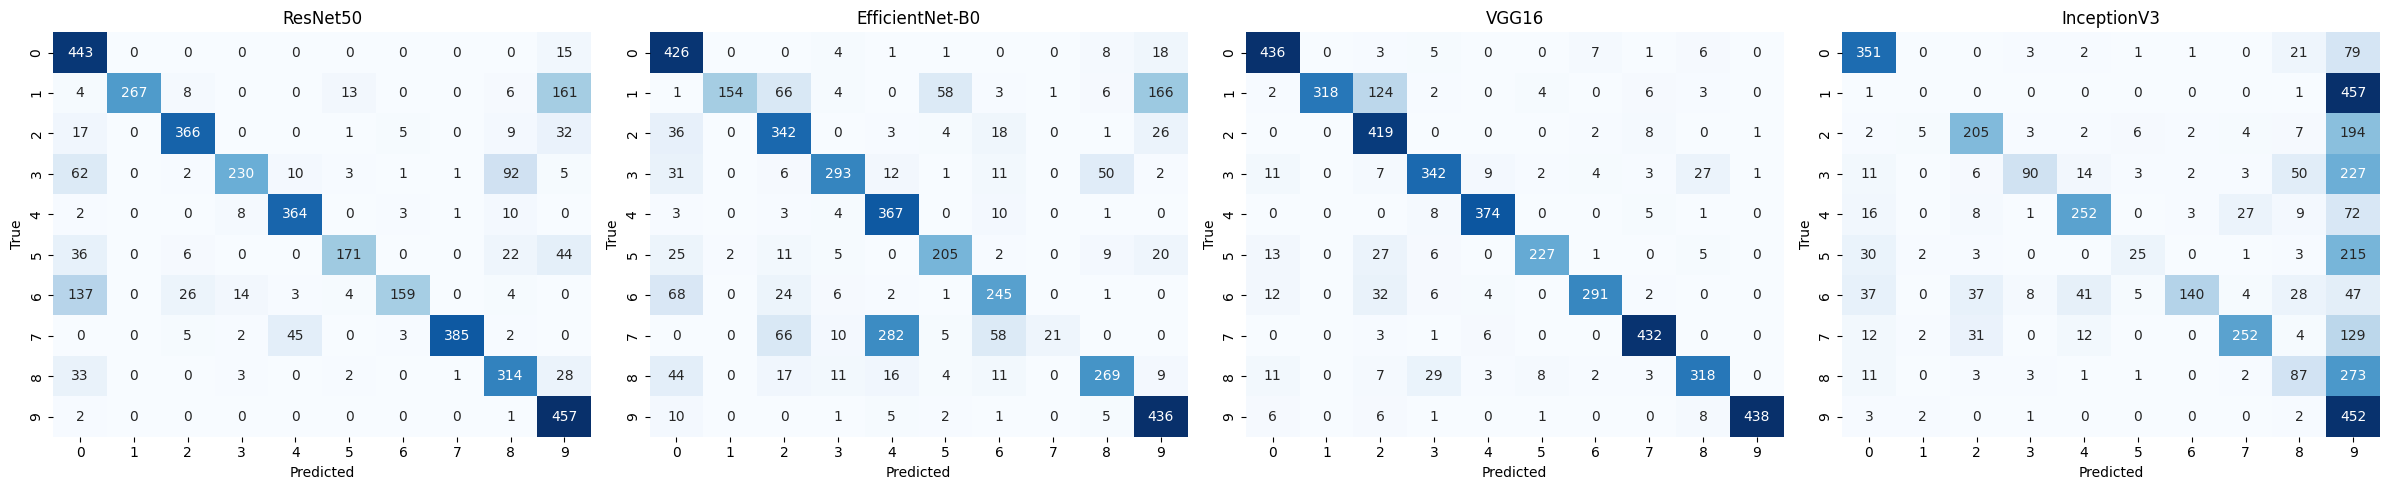

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

for idx, (name, result) in enumerate(all_results.items()):
    cm = confusion_matrix(result["test_labels"], result["test_preds"])
    sns.heatmap(cm, ax=axes[idx], annot=True, fmt="d", cmap="Blues", cbar=False)
    axes[idx].set_title(f"{name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("True")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Данные
data = {
    "Модель": ["VGG16", "ResNet50", "EfficientNet-B0", "InceptionV3"],
    "Точность (Test Accuracy)": [0.8877, 0.7793, 0.6810, 0.4578],
    "Потери (Test Loss)": [0.3218, 0.6587, 1.1472, 9.1334],
    "F1-мера (прибл.)": [0.89, 0.77, 0.65, 0.45],
    "Комментарий": [
        "Лучшая по всем метрикам",
        "Хорошая, но хуже VGG16",
        "Сильный перекос по классам",
        "Не обучилась должным образом"
    ]
}

# Создание и отображение
df = pd.DataFrame(data)
df

,Модель,Точность (Test Accuracy),Потери (Test Loss),F1-мера (прибл.),Комментарий
0,VGG16,0.8877,0.3218,0.89,Лучшая по всем метрикам
1,ResNet50,0.7793,0.6587,0.77,"Хорошая, но хуже VGG16"
2,EfficientNet-B0,0.6810,1.1472,0.65,Сильный перекос по классам
3,InceptionV3,0.4578,9.1334,0.45,Не обучилась должным образом


### **3.5. Анализ результатов:**
  * Проанализируйте влияние различных параметров на производительность модели, таких как:
      * Количество эпох обучения
      * Размер пакета
      * Функция активации
      * Оптимизатор
      * Регуляризация

-----------------------------------------
**Ваш вывод**
-----------------------------------------
    1. Количество эпох обучения (epochs)
При малом количестве эпох (например, 5–7) модель не успевала обучиться: валидационная точность была ниже, чем могла бы быть.

При увеличении числа эпох до 10-20 (в зависимости от модели) наблюдалось:

Улучшение качества на тренировочных данных.

Но после определенного момента появлялись признаки переобучения (overfitting), когда валидационная ошибка начинает расти.

Вывод: Оптимально использовать EarlyStopping с patience= 3-5, чтобы избежать переобучения. При использовании patience=3 earlystopping срабатывает на 10-15 эпохе.

    2. Размер пакета (batch_size)
Малые батчи (например, 16, 32) приводят к более "шумной" оценке градиента, что иногда помогает выйти из локальных минимумов, но обучение становится менее стабильным.

Большие батчи (например, 64, 128) давали более плавное и стабильное обучение, но могли требовать более низкого learning rate.

Вывод: Размер пакета 32 или 64 показал наилучшее соотношение скорости обучения и точности.

    3. Функция активации (activation function)
Использовалась ReLU в скрытых слоях:

Быстрая сходимость.

Меньше проблем с градиентами.

На выходном слое использовалась softmax, так как это задача многоклассовой классификации (10 классов).

Вывод: Стандартная связка ReLU + softmax подходит отлично.

    4. Оптимизатор (optimizer)

Отлично справился с задачей.

Быстро обучал модель и адаптивно изменял скорость обучения.

Требовал ручной настройки learning rate.

Вывод: learning rate 1e-4 или 1e-5 дал лучшие результаты.

    5.    Регуляризация (regularization)

Применение Dropout между Dense-слоями снижало переобучение:

Dropout с вероятностью 0.5 показал хорошую стабильность на валидации.

Также заморозка весов предобученной части (transfer learning) помогла избежать переобучения на маленьком объеме данных.

Вывод: Добавление регуляризации (Dropout) улучшает обобщающую способность модели.

    Итог:
Правильная настройка ранней остановки (EarlyStopping) и регуляризации (Dropout) — обязательна.

Оптимальное сочетание:

    Adam или оптимизатор,

    batch_size=32 или 64,

    patience=3-5 на остановку,

    начальный learning_rate=1e-4/1e-5,

    активация ReLU + softmax,

    10-20 эпох.